### Курсовой проект
В проектной работе хотел бы сделать анализ по годам выпуска фильма по данным imdb.com.<br>
По годам выпуска рассчитать основные статистические показатели: Мода, медиана, квартили, дисперсию.<br>
Проверить, работает ли нормальное распределение и Паретто.<br>
Проверить есть ли зависимость бюджетов, рейтингов, жанров от года выпуска фильмов.<br>
Посмотреть поведение год выпуска во времени.<br>
В идеале, хотел бы сделать прогноз на 2020 год: какие жанры с какой вероятностью выйдут определенное количество фильмов с определенным бюджетом и из какой страны<br>

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats

In [17]:
akas = pd.read_csv('data_akas.csv', sep='\t', low_memory=False)
akas.dtypes

titleId            object
ordering            int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtype: object

In [19]:
#akas_f = akas[akas['isOriginalTitle'] == '1']
#akas_f.dropna(inplace = True)   
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Καρμενσίτα,GR,\N,\N,\N,0
2,tt0000001,3,Карменсита,RU,\N,\N,\N,0
3,tt0000001,4,Carmencita,US,\N,\N,\N,0
4,tt0000001,5,Carmencita,\N,\N,original,\N,1
5,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
6,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
7,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
8,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
9,tt0000002,5,Клоун и его собаки,RU,\N,\N,\N,0


In [5]:
ratings = pd.read_csv('data_ratings.csv', sep='\t', low_memory=False)
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.6,1552
1,tt0000002,6.1,186
2,tt0000003,6.5,1212
3,tt0000004,6.2,113
4,tt0000005,6.1,1939
5,tt0000006,5.2,103
6,tt0000007,5.4,617
7,tt0000008,5.4,1671
8,tt0000009,5.4,81
9,tt0000010,6.9,5565


In [6]:
basics = pd.read_csv('data_basics.csv', sep='\t', low_memory=False)

In [29]:
basics_f = basics[(basics['titleType'] == 'movie') & (basics['startYear'] != '\\N') & (basics['genres'] != '\\N')]
basics_f['genre'] = basics_f['genres'].str.split(',', expand=True)[0]
basics_f = basics_f.drop(columns=['isAdult', 'endYear', 'runtimeMinutes', 'genres', 'primaryTitle'])
basics_f

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tconst,titleType,originalTitle,startYear,genre
8,tt0000009,movie,Miss Jerry,1894,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,Documentary
332,tt0000335,movie,Soldiers of the Cross,1900,Biography
571,tt0000574,movie,The Story of the Kelly Gang,1906,Biography
611,tt0000615,movie,Robbery Under Arms,1907,Drama
626,tt0000630,movie,Amleto,1908,Drama
669,tt0000675,movie,Don Quijote,1908,Drama
670,tt0000676,movie,Don Álvaro o la fuerza del sino,1908,Drama
673,tt0000679,movie,The Fairylogue and Radio-Plays,1908,Adventure
730,tt0000739,movie,El pastorcito de Torrente,1908,Drama


In [34]:
summary = pd.merge(basics_f, ratings, on='tconst', how='inner')
summary

,tconst,titleType,originalTitle,startYear,genre,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,81
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,Documentary,5.2,310
2,tt0000335,movie,Soldiers of the Cross,1900,Biography,6.2,39
3,tt0000574,movie,The Story of the Kelly Gang,1906,Biography,6.1,538
4,tt0000615,movie,Robbery Under Arms,1907,Drama,4.8,14
5,tt0000630,movie,Amleto,1908,Drama,3.4,11
6,tt0000675,movie,Don Quijote,1908,Drama,4.2,9
7,tt0000676,movie,Don Álvaro o la fuerza del sino,1908,Drama,3.6,8
8,tt0000679,movie,The Fairylogue and Radio-Plays,1908,Adventure,4.8,32
9,tt0000739,movie,El pastorcito de Torrente,1908,Drama,6.2,8


In [62]:
genres = summary['genre'].unique()
genres

array(['Romance', 'Documentary', 'Biography', 'Drama', 'Adventure',
       'Comedy', 'Crime', 'Sci-Fi', 'History', 'War', 'Action', 'Western',
       'Horror', 'Fantasy', 'Mystery', 'Animation', 'Musical', 'Thriller',
       'Music', 'Film-Noir', 'Family', 'Sport', 'Adult', 'News',
       'Game-Show', 'Reality-TV'], dtype=object)

In [52]:
years = np.sort(summary['startYear'].unique())
years

array(['1894', '1897', '1898', '1899', '1900', '1901', '1902', '1903',
       '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911',
       '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919',
       '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927',
       '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935',
       '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943',
       '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
      

Функция, которая считает какого жанра было выпущено в каждом году и формирует по окончанию numpy-массив

In [82]:
def count_genres(genre):
    SpisokZhanrov = genres.tolist()
    KolvoVGodu = []
    for i in years:
        ZhanryZaGod = summary[summary['startYear'] == i]
        ZhanryZaGodBezGodv = ZhanryZaGod['genre']
        listgenres = ZhanryZaGodBezGodv.tolist()
        cnt = Counter(listgenres)
        #print(i)
        #print(cnt)
        KolvoVGodu.append(cnt[genre])
    kolvo_array = np.array(KolvoVGodu)
    return kolvo_array

Проведем расчет Моды, медианы, квартиля и дисперсии для жанра "Драма"

In [98]:
array_drama = count_genres('Drama')

dtype('int32')

In [92]:
drama_mean = np.mean(array_drama)
drama_mean

530.7741935483871

In [93]:
drama_median = np.median(array_drama)
drama_median

428.0

In [96]:
drama_mode = stats.mode(array_drama, axis=None)
drama_mode

ModeResult(mode=array([0]), count=array([9]))

In [100]:
drama_d = pow(np.std(array_drama),2)
drama_d

23.513123318088873

Изобразим квантили при помощи графика seaborn

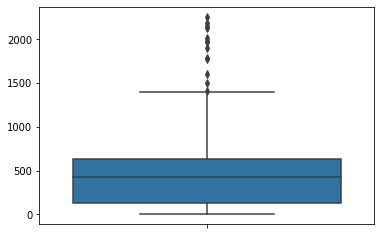

In [101]:
import seaborn as sns
sns.boxplot(array_drama, orient='v')
plt.show()